## IMPORTAR BIBLIOTECAS

In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

### **Verificar versão do TF**

In [ ]:
assert hasattr(tf, "function") 
print(tf.__version__)

2.9.2


## **CARREGAR O DATASET** Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

#tomar apenas uma parte do dataset para o exemplo
images = images[:10000]
targets = targets [:10000]

# Redimensione o conjunto de dados e converta para float.
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape) #retorna uma tabela do tipo linhas x 784 (28x28), que é a entrada descritiva da imagem
print(targets.shape) #retorna a categoria da imagem

(10000, 784)
(10000,)


## Plotar alguns dos dados

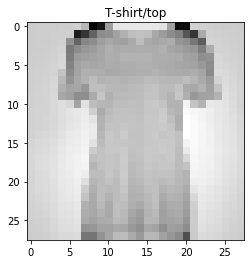

In [ ]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#plotar a imagem de índice 10
plt.imshow(np.reshape(images[10], (28, 28)), cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [ ]:
#descrever alguns dados do meu exemplo
print("primeira linha dos pixels da minha imagem:", images[10][0])
print('Tipo (target) associado:', targets[10])

primeira linha dos pixels da minha imagem: -0.0142697062475628
Tipo (target) associado: 0


# **Criar o modelo para prever o tipo de imagem**

São 256 neurônios na entrada, associados a uma outra camada de 128, seguidos da saída com 10 do tipo softmax, para previsão dentre as 10 categorias

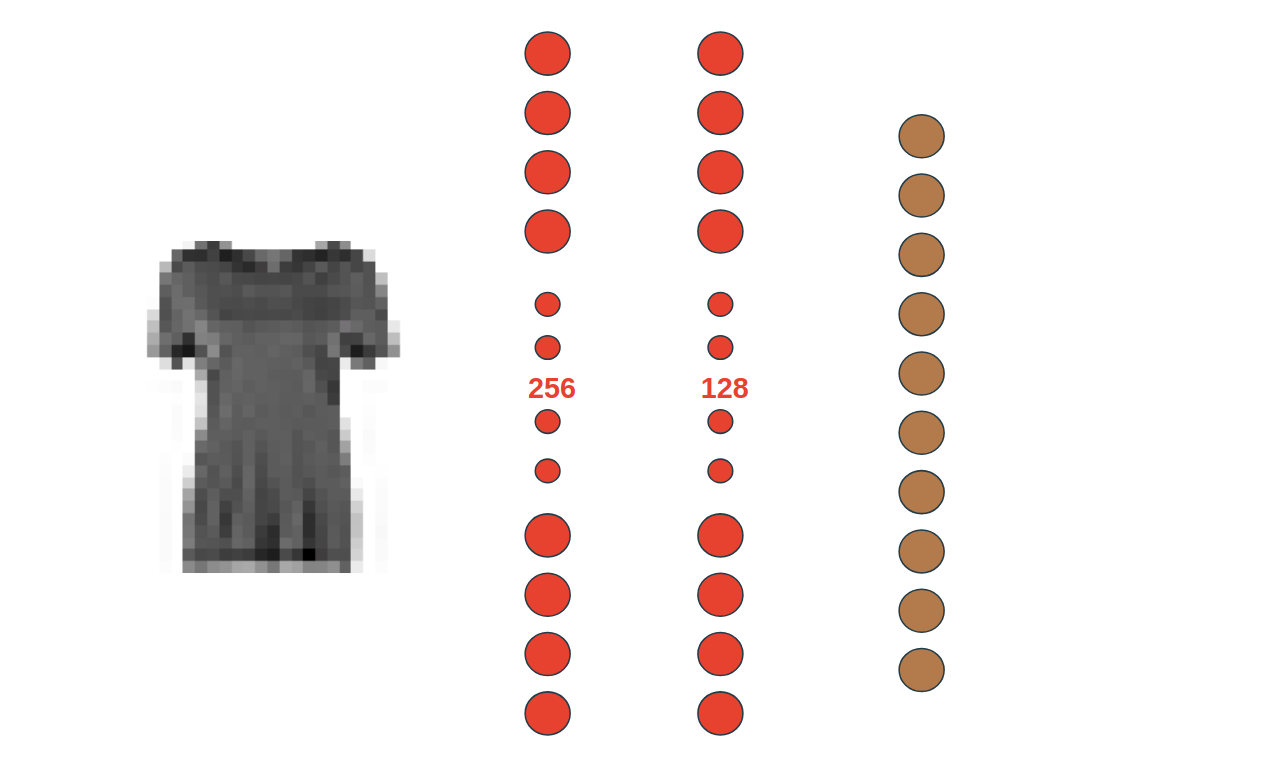

In [ ]:
#Modelo
model = tf.keras.models.Sequential()

#camadas
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

#exemplo de saída com esse modelo
model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 323ms/step
[[0.07876531 0.04930195 0.01877033 0.15367907 0.10795526 0.2179821
  0.01790681 0.24110678 0.04948912 0.06504331]] [9]


## **DESCRIÇÃO DO MODELO**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## **COMPILAR O MODELO**

In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",  #produz um índice de categoria da categoria correspondente mais provável.
    optimizer="sgd",
    metrics=["accuracy"]
)

In [ ]:
import pydot
from tensorflow.keras.callbacks import EarlyStopping

#colocar um monitor para evitar excesso de épocas
monitor = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10,
                verbose=2, mode='auto', restore_best_weights=True)


### Treinar o modelo

In [ ]:
history = model.fit(images, targets, epochs=500, validation_split=0.2,
        verbose=2, callbacks=[monitor], initial_epoch=0, batch_size=10)

Epoch 1/500
800/800 - 5s - loss: 0.6660 - accuracy: 0.7639 - val_loss: 0.5289 - val_accuracy: 0.8055 - 5s/epoch - 6ms/step
Epoch 2/500
800/800 - 3s - loss: 0.4118 - accuracy: 0.8474 - val_loss: 0.4659 - val_accuracy: 0.8275 - 3s/epoch - 3ms/step
Epoch 3/500
800/800 - 2s - loss: 0.3380 - accuracy: 0.8784 - val_loss: 0.4384 - val_accuracy: 0.8395 - 2s/epoch - 2ms/step
Epoch 4/500
800/800 - 2s - loss: 0.2947 - accuracy: 0.8926 - val_loss: 0.4331 - val_accuracy: 0.8485 - 2s/epoch - 2ms/step
Epoch 5/500
800/800 - 2s - loss: 0.2542 - accuracy: 0.9146 - val_loss: 0.4242 - val_accuracy: 0.8460 - 2s/epoch - 2ms/step
Epoch 6/500
800/800 - 2s - loss: 0.2229 - accuracy: 0.9229 - val_loss: 0.4408 - val_accuracy: 0.8515 - 2s/epoch - 2ms/step
Epoch 7/500
800/800 - 2s - loss: 0.1941 - accuracy: 0.9335 - val_loss: 0.4643 - val_accuracy: 0.8435 - 2s/epoch - 2ms/step
Epoch 8/500
800/800 - 2s - loss: 0.1710 - accuracy: 0.9429 - val_loss: 0.4491 - val_accuracy: 0.8525 - 2s/epoch - 2ms/step
Epoch 9/500
800/

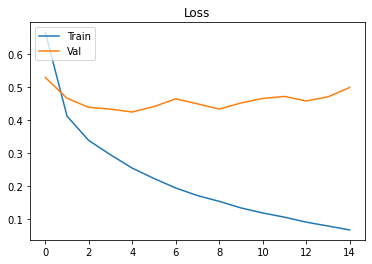

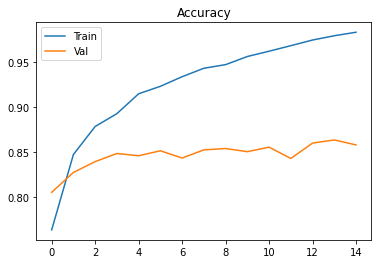

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [ ]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.8443
Test Loss 0.4557068347930908
Test Accuracy 0.8442999720573425


## Plotar um gráfico para visualizar as previsões

313/313 [==============================] - 1s 2ms/step


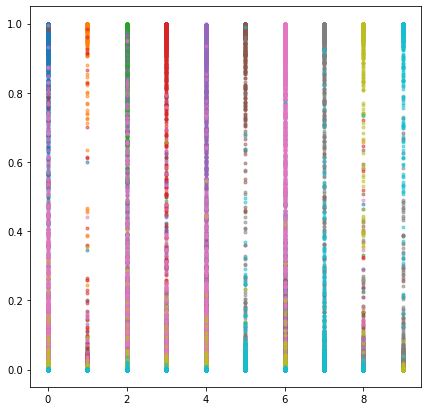

In [ ]:
y_true = targets
y_pred = model.predict(images)
plt.figure(figsize=(7, 7))
plt.plot(y_true, y_pred, '.', alpha=0.5);
plt.show()